# Ejercicio 5 Guia 3

Realizar un algoritmo en R que genere un árbol binario de clasificación binaria, para datos con
dos predictores. Utilizar como criterio de costo el error de clasificación en cada una de las regiones y
como criterio de corte, que haya un mínimo de dos observaciones en cada nodo terminal. Aplicarlo
sobre algunos de los datos anteriores (eligiendo) dos predictores solamente.

Llamaremos a la cantidad de observaciones mínimas de un cluster, min_obs.

## Algoritmo

1. Se crea un nodo raíz. Se vincularán a este nodo todas las observaciones disponibles.
2. Para el nodo  seleccionado y las observaciones vinculadas al nodo:
3. Armar una lista de predictores ordenados al azar. La llamaremos pred.  
4. Para cada predictor pred[i]:   
    4.1 Armar una lista ordenada de valores que puede tomar el predictor pred[i], eiminando las repeticiones. La llamaremos obs[j].  *(Se eliminan las repeticiones ya que no tiene sentido hacer varias veces el mismo procesamiento para el mismo valor)*  
    4.2 Para cada valor de obs[j] con j variando desde min_obs+1 hasta length(obs)-min_obs: *Estos límites se toman para cumplir con la condición de cantidad mínima de observaciones, se puede hacer que j varíe linealmente entre esos límites, o se puede pasar por todos los valores de j propuestos en orden aleatorio. Esto hace que se puedan tener distintos árboles para cada corrida sin alterar la esencia del algoritmo*  
       4.2.1 Calcular el error suponiendo que las observaciones para las que pred[i] sea menor a $(obs[j-1] + obs[j])/2$ pertenecen a la clase 1 y las observaciones para las que pred[i] sea mayor a $(obs[j-1] + obs[j])/2$ pertenecen a la clase 2.  
       4.2.2 Calcular el error suponiendo que las observaciones para las que pred[i] sea menor a $(obs[j-1] + obs[j])/2$ pertenecen a la clase 2 y las observaciones para las que pred[i] sea mayor a $(obs[j-1] + obs[j])/2$ pertenecen a la clase 1.  
   4.3 Quedarse con el caso de menor error de los dos puntos anteriores calculados para todos los pred[i]. Si salió de 4.2.1 definiremos clase1L=TRUE si salió de 4.2.2 definiremos clase1L=FALSE. Definiremos errorL como el error de clasificación para el cluster cuyas observaciones están por debajo del umbral y errorR como el error de clasificación para el cluster cuyas observaciones están por encima del umbral. ($umbral=(obs[j-1] + obs[j])/2$, para la combinación i,j de menor costo). Definiremos también best_pred como el predictor pred[i] para el cual se cumplió la condición de mínimo error. Definiremos cantL como la cantidad de observaciones obsL que quedaron por debajo del umbral y cantR como la cantidad de observaciones obsR que quedaron por encima del umbral.   
   4.4 Para el nodo que se está procesando se asocia la condición "Si pred[i] < umbral" y se crean dos nodos hijo, uno para la condición=verdadera y otro para la condición=falsa. Los llamaremos nodoL y nodoR respectivamente.  
   4.5 Si errorL=0 o cantL=min_obs:  
   - nodoL es una hoja y su valor es clase1 si clase1L=TRUE o clase2 si clase1L=FALSE. 
   - Caso contrario se selecciona el nodoL con las observaciones obsL y se empieza a correr otra instancia del algoritmo desde el punto 2. Cuando termine la ejecución de ese algoritmo se volverá a este punto.
   4.6 Si errorR=0 o cantR=min_obs:  
   - nodoR es una hoja y su valor es clase2 si clase1L=TRUE o clase1 si clase1L=FALSE. 
   - Caso contrario se selecciona el nodoR con las observaciones obsR y se empieza a correr otra instancia del algoritmo desde el punto 2. Cuando termine la ejecución de ese algoritmo se volverá a este punto.
5. Fin del algoritmo
   
## Implementación del árbol como estructura de datos

El árbol se guardará en un dataframe con las siguientes columnas: 

- id: id del nodo
- parent: id del nodo padre (-1 para el raíz)
- left_child: id del hijo izquierdo
- right_child: id del hijo derecho
- predictor: en el caso de que no sea una hoja (o nodo terminal), qué predictor se usará para hacer la comparación.
- threshold: el valor de umbral contra el que se comparará el predictor correspondiente a cada observación, para elegir al hijo en el procedimiento de decisión
- leaf: TRUE si es hoja, FALSE si tiene hijos.
- class: si es hoja, qué clase se debe devolver cuando se llega a este nodo.

Para operar con el árbol se definen las siguientes funciones:

* create_tree(): crea un árbol. Devuelve una estructura *out* con los siguientes elementos:
 * out\$next_id: próximo id a utilizar cuando se cree un nodo  
 * out\$nodes: cantidad de nodos del árbol  
 * out\$tree: dataframe con el árbol  

* add_root(tree): crea el nodo raíz. Recibe una estructura igual a la que devuelve create_tree, devuelve la estructura actualizada.

* add_sons(tree,parent_id): crea dos hijos para el nodo parent_id. Recibe una estructura igual a la que devuelve create_tree, devuelve la estructura actualizada.

* edit_node(tree,node_id,predictor,threshold,class): actualiza los valores predictor, threshold y class para el nodo node_id. Recibe una estructura igual a la que devuelve create_tree, mas los valores de predictor, threshold y class. Devuelve la estructura actualizada.

A continuación, la implementación del árbol:

In [1]:
create_tree <- function(){
    tree=data.frame("id"=integer(), "parent"=integer(),"left_child"=integer(), "right_child"=integer(), "predictor"=integer(),"threshold"=double(), "leaf"=logical(), "class"=double())
    next_id=0
    nodes=0
    return(list(tree=tree,next_id=next_id,nodes=nodes))
}

add_root <- function(tree){
    if(tree$nodes==0){
        tree$tree=rbind(tree$tree,list("id"=tree$next_id,"parent"=-1,"left_child"=-1,"right_child"=-1,"predictor"=-1,"threshold"=0,leaf=TRUE,class=-1))
    } else {
        print("Tree must be empty")
    }
    #print(tree$tree)
    tree$next_id=tree$next_id+1
    tree$nodes=tree$nodes+1
    return(tree)
}

add_sons <- function(tree,parent_id){
    tree$tree=rbind(tree$tree,list("id"=tree$next_id,"parent"=parent_id,"left_child"=-1,"right_child"=-1,"predictor"=-1,"threshold"=0,leaf=TRUE,class=-1))
    tree$tree[tree$tree["id"]==parent_id,]["left_child"]=tree$next_id
    tree$next_id=tree$next_id+1
    tree$tree=rbind(tree$tree,list("id"=tree$next_id,"parent"=parent_id,"left_child"=-1,"right_child"=-1,"predictor"=-1,"threshold"=0,leaf=TRUE,class=-1))
    tree$tree[tree$tree["id"]==parent_id,]["right_child"]=tree$next_id
    tree$next_id=tree$next_id+1
    tree$tree[tree$tree["id"]==parent_id,]["leaf"]=FALSE
    tree$nodes=tree$nodes+2
    return(tree)
}

edit_node <- function(tree,node_id,predictor=-1,threshold=-1,class=-1){
    tree$tree[tree$tree["id"]==node_id,]["predictor"]=predictor
    tree$tree[tree$tree["id"]==node_id,]["threshold"]=threshold
    tree$tree[tree$tree["id"]==node_id,]["class"]=class
    return(tree)
}

### Pruebas del árbol definido

In [2]:
# Creo un árbol
arbol=create_tree()
arbol

id,parent,left_child,right_child,predictor,threshold,leaf,class


In [3]:
# Agrego el nodo raíz
arbol=add_root(arbol)
arbol

id,parent,left_child,right_child,predictor,threshold,leaf,class
0,-1,-1,-1,-1,0,TRUE,-1


In [4]:
# Creo dos hijos para el nodo raíz
arbol=add_sons(arbol,0)
arbol

id,parent,left_child,right_child,predictor,threshold,leaf,class
0,-1,1,2,-1,0,FALSE,-1
1,0,-1,-1,-1,0,TRUE,-1
2,0,-1,-1,-1,0,TRUE,-1


In [5]:
# Modifico los valores de predictor, threshold y class para el nodo 2
arbol=edit_node(arbol,2,4,5,2)
arbol

id,parent,left_child,right_child,predictor,threshold,leaf,class
0,-1,1,2,-1,0,FALSE,-1
1,0,-1,-1,-1,0,TRUE,-1
2,0,-1,-1,4,5,TRUE,2


In [6]:
# Creo dos hijos para el nodo dos
arbol=add_sons(arbol,2)
arbol

id,parent,left_child,right_child,predictor,threshold,leaf,class
0,-1,1,2,-1,0,FALSE,-1
1,0,-1,-1,-1,0,TRUE,-1
2,0,3,4,4,5,FALSE,2
3,2,-1,-1,-1,0,TRUE,-1
4,2,-1,-1,-1,0,TRUE,-1


## Implementación del algoritmo

Para implementar el árbol de decisiones se utilizarán funciones recurrentes. La naturaleza recurrente del algoritmo está explícita en el punto 4.5 detallado anteriormente.

Las funciones que se implementarán serán:

* get_part(x,target,min_obs,clase1, clase2): recibe un conjunto de observaciones, el nombre de la columna de target (con las clases) y la cantidad de observaciones mínimas por nodo. También recibe los elementos que define a las clases 1 y 2. Devuelve una estructura out cuyos elementos son:
 * out\$pred: predictor que se utilizará para dividr las observaciones en dos subconjuntos. Es el pred[i] mencionado en el punto 4.4.
 * out\$val: valor de  umbral contra el que se comparará pred[i]. Es el umbral mencionado en el punto 4.4
 * out\$class1L: TRUE si la clase 1 queda por debajo del umbral, FALSE caso contrario, según lo especificado en el punto 4.3
 * out\$errorL: errorL definido en el punto 4.3 del algoritmo.
 * out\$errorR: errorR definido en el punto 4.3 del algoritmo.
 * out\$cantL: cantidad de observaciones que quedan por debajo del umbral
 * out\$cantR: cantidad de observaciones que quedan por encima del umbral

In [7]:
get_part <- function(x,target,min_obs,clase1,clase2) {
    n_preds=ncol(x)-1
    n_obs=nrow(x)
    pred_cut=0
    pred_val=0
    error=100000000
    errorL=0
    errorR=0
    cantL=0
    cantR=0
    finR=FALSE
    finL=FALSE
    class1L=TRUE
    for (pred in sample(n_preds)){ #Implementa los puntos 3 ,4 y 4.1 del algoritmo
        x_aux=unique(x[pred]) #Implementa el punto 4.2
        x_aux=x_aux[order(x_aux),]
        for (idx in sample(length(x_aux)-1)) { #Implementa el punto 4.2 
            umb=0.5*(x_aux[idx]+x_aux[idx+1])
            sel=(x[pred]<umb)
            cantL_aux=nrow(x[sel,]) # cuántas observaciones quedaron por debajo del umbral
            cantR_aux=nrow(x[!sel,]) # cuántas observaciones quedaron igual o por encima del umbral
            if(cantL_aux>=min_obs & cantR_aux>=min_obs){
                errorL_aux=sum(x[target][sel,]==clase2) #Pruebo clasificando la clase1 debajo del umbral y clase2 igual o por encima
                errorR_aux=sum(x[target][!sel,]==clase1)
                aux_error=errorL_aux+errorR_aux
                if(aux_error < error) { #si el error obtenido para esta clasificación es menor que el mínimo guardado, actualizo los parámetros
                    pred_cut=pred
                    pred_val=umb
                    class1L=TRUE
                    error=aux_error
                    errorL=errorL_aux
                    errorR=errorR_aux
                    cantR=cantR_aux
                    cantL=cantL_aux
                }
                errorL_aux=sum(x[target][sel,]==clase1) #Pruebo clasificando la clase2 debajo del umbral y clase1 igual o por encima
                errorR_aux=sum(x[target][!sel,]==clase2)
                aux_error=errorL_aux+errorR_aux
                if(aux_error<error) { #si el error obtenido para esta clasificación es menor que el mínimo guardado, actualizo los parámetros
                    pred_cut=pred
                    pred_val=umb
                    class1L=FALSE
                    error=aux_error
                    errorL=errorL_aux
                    errorR=errorR_aux
                    cantR=cantR_aux
                    cantL=cantL_aux
                }

            }
        }
    }
    if(cantR==min_obs || errorR==0){    #Si están todos correctamente clasificados, o el cluster tiene la mínima cantidad de observaciones, 
                                        #el nodo derecho no requiere mas procesamiento
        finR=TRUE
    }
    if(cantL==min_obs || errorL==0){    #Si están todos correctamente clasificados, o el cluster tiene la mínima cantidad de observaciones, 
                                        #el nodo izquierdo no requiere mas procesamiento
        finL=TRUE
    }
    return(list(pred=pred_cut,umb=pred_val,left=class1L,errorR=errorR,errorL=errorL,cantL=cantL,cantR=cantR,finL=finL,finR=finR))
}

Se debe hacer una división con pred1<-0.5 --> TRUE.
Eso deja  0 mal clasificados a izquierda y 2 mal clasificados a derecha.

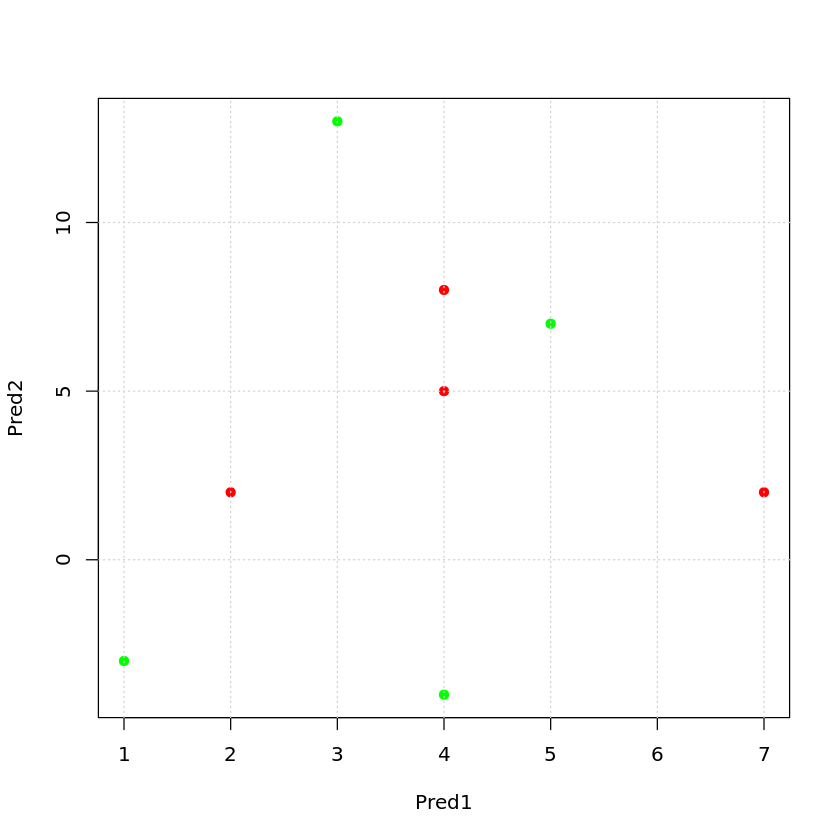

In [8]:
# Pruebas

min_obs=2
clase1="verde"
clase2="rojo"

# Dataframe de prueba para probar las funciones
x=data.frame("pred1"=c(1,4,4,4,3,2,7,5),"pred2"=c(-3,-4,5,8,13,2,2,7),"color"=c("verde","verde","rojo","rojo","verde","rojo","rojo","verde"))
plot(x$pred1,x$pred2, col=c("red","green")[x$color],
     xlab = 'Pred1', ylab = 'Pred2', pch = 19)
grid()

#Se prueba la función que busca la partición de menor error
alpha=get_part(x,"color",min_obs,clase1,clase2)

cat("Se debe hacer una división con ",colnames(x)[1],"<", alpha$umb," --> ",alpha$left,".",sep="")
cat("\nEso deja ",alpha$errorL,"mal clasificados a izquierda y",alpha$errorR,"mal clasificados a derecha.")

Se implementará la función:

* recurr_arbol(tree, x, target,min_obs,clase1, clase2): recibe un nodo, un dataframe con los datos, el nombre de la columna con las clases de destino, la cantidad mínima de observaciones por cluster y los elemenos que definen las clases 1 y 2. Devuelve una estructura de datos out cuyos elementos son:

 * out\$next_id: próximo id a utilizar cuando se cree un nodo  
 * out\$nodes: cantidad de nodos del árbol  
 * out\$tree: dataframe con el árbol
 
los cuales representan un arbol entrenado. La función implementa la etapa recursiva del algoritmo anteriormente presentado.


In [9]:
recurr_arbol <- function(x, target,min_obs,clase1, clase2){
    alfa=get_part(x, target,min_obs,clase1, clase2)
    cat("Se debe hacer una división con ",colnames(x)[1],"<", alfa$umb," --> ",alfa$left,".",sep="")
    cat("\nEso deja ",alfa$errorL,"mal clasificados a izquierda y",alfa$errorR,"mal clasificados a derecha.\n")
    sel=(x[alfa$pred]<alfa$umb)
    if(alfa$finL==FALSE){
        sub_arbolL=x[sel,]
        recurr_arbol(sub_arbolL,target,min_obs,clase1,clase2)
    }
    if(alfa$finR==FALSE){
        sub_arbolR=x[!sel,]
        recurr_arbol(sub_arbolR,target,min_obs,clase1,clase2)
    }
}

Se debe hacer una división con pred1<-0.5 --> TRUE.
Eso deja  0 mal clasificados a izquierda y 2 mal clasificados a derecha.
Se debe hacer una división con pred1<6 --> FALSE.
Eso deja  0 mal clasificados a izquierda y 1 mal clasificados a derecha.
Se debe hacer una división con pred1<0 --> TRUE.
Eso deja  0 mal clasificados a izquierda y 0 mal clasificados a derecha.


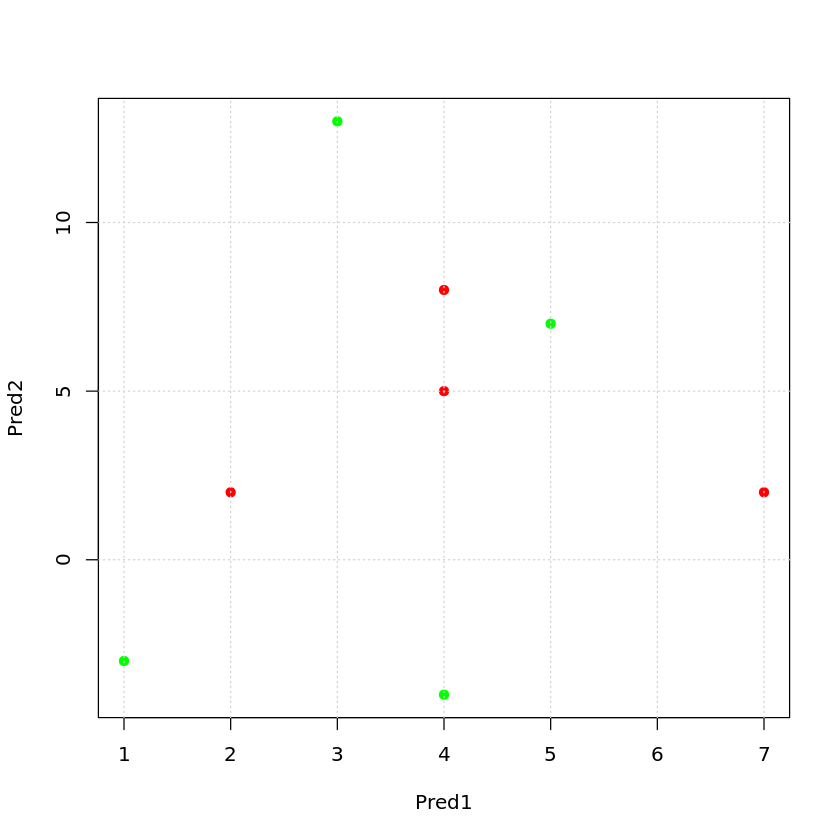

In [10]:
# Se hace una prueba sobre recurr_arbol. Cabe aclarar que el texto presentado no alcanza para construir el arbol en su totalidad.
plot(x$pred1,x$pred2, col=c("red","green")[x$color],
     xlab = 'Pred1', ylab = 'Pred2', pch = 19)
grid()
recurr_arbol(x,"color",2,"verde","rojo")

En principio en R no se pueden pasar referencias (ver https://stackoverflow.com/questions/2603184/can-you-pass-by-reference-in-r) lo cual hace que el manejo de la memoria pasando el arbol en cada llamado de recurrencia sea muy ineficiente. Por ello, se va a definir un arbol de forma global, y se modificarán las funciones para que vayan modificando el árbol. De esta forma se evita hacer muchas copias del mismo.

In [11]:
# Creo el decision tree
decision_tree=create_tree()
decision_tree

id,parent,left_child,right_child,predictor,threshold,leaf,class


In [12]:
# Creo el nodo raíz y lo dejo vacío
decision_tree=add_root(decision_tree)
decision_tree

id,parent,left_child,right_child,predictor,threshold,leaf,class
0,-1,-1,-1,-1,0,TRUE,-1


In [13]:
recurr_arbol <- function(decision_tree, current_node,x, target,min_obs,clase1, clase2){
    alfa=get_part(x, target,min_obs,clase1, clase2)
    if(alfa$pred!=0){ # Si pudo hacer alguna división que cumpla con la condición de min_obs
        decision_tree=edit_node(decision_tree,current_node,alfa$pred,alfa$umb,alfa$left) #Se guarda la clase favorecida por si en algún momento se implementa el pruning
        decision_tree=add_sons(decision_tree,current_node)
        sonL=decision_tree$next_id-2
        sonR=decision_tree$next_id-1
        decision_tree=edit_node(decision_tree,sonL,class=alfa$left)
        decision_tree=edit_node(decision_tree,sonR,class=alfa$left)
    }
    sel=(x[alfa$pred]<alfa$umb)
    if(alfa$finL==FALSE){
        sub_arbolL=x[sel,]
        decision_tree=recurr_arbol(decision_tree,sonL,sub_arbolL,target,min_obs,clase1,clase2)
    }
    if(alfa$finR==FALSE){
        sub_arbolR=x[!sel,]
        decision_tree=recurr_arbol(decision_tree,sonR,sub_arbolR,target,min_obs,clase1,clase2)
    }
    return(decision_tree)
}

id,parent,left_child,right_child,predictor,threshold,leaf,class
0,-1,1,2,2,-0.5,FALSE,1
1,0,-1,-1,-1,-1.0,TRUE,1
2,0,3,4,2,6.0,FALSE,0
3,2,-1,-1,-1,-1.0,TRUE,0
4,2,-1,-1,-1,-1.0,TRUE,0


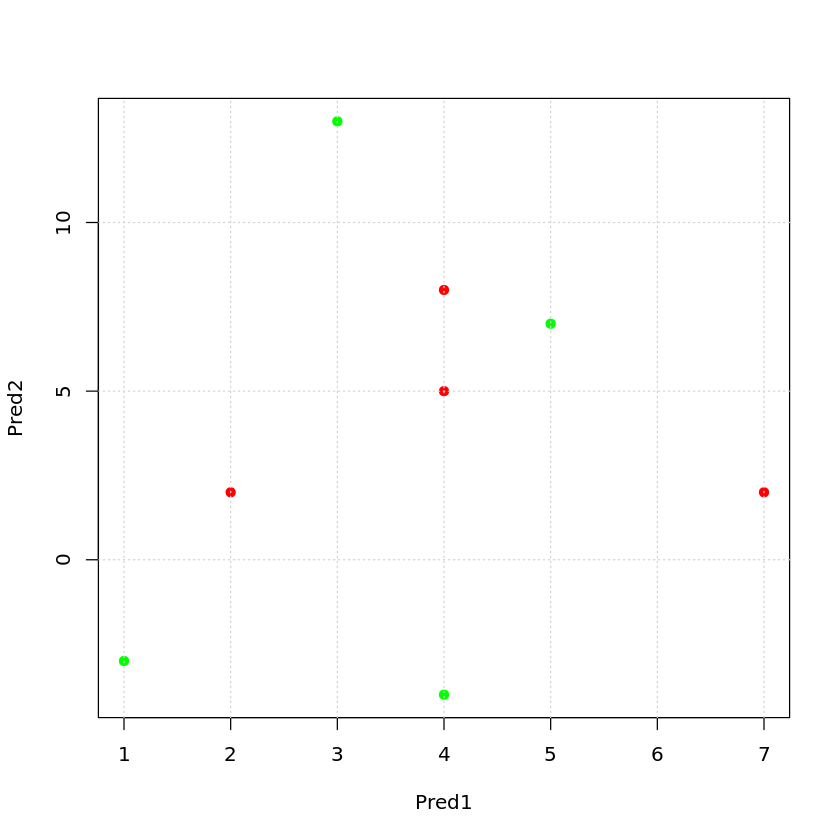

In [14]:
# Se hace una prueba sobre recurr_arbol. Cabe aclarar que el texto presentado no alcanza para construir el arbol en su totalidad.
plot(x$pred1,x$pred2, col=c("red","green")[x$color],
     xlab = 'Pred1', ylab = 'Pred2', pch = 19)
grid()
decision_tree=recurr_arbol(decision_tree,0,x,"color",2,"verde","rojo")
decision_tree

Para la utilización del árbol como predictor lo único que hay que tener en cuenta es que cuando la condición es verdadera, se debe bajar por la rama izquierda, y cuando la condición es falsa, se debe bajar por la rama derecha.
Generemos una función que reciba el árbol y un dataframe con observaciones y devuelva las clasificaciones:

In [15]:
decision_tree_predict <- function(decision_tree,x,clase1,clase2){
    cant_obs=nrow(x)
    output=rep(-1,cant_obs)
    for(i in 1:cant_obs) { #Se corre este procedimiento para cada observación
        obs <- x[i,]
        end=FALSE #se hará TRUE cuando llegue a una hoja
        node_id=0 #nodo raíz
        while(end==FALSE){
            node=decision_tree$tree[decision_tree$tree$id==node_id,]
            if(node[["leaf"]]==TRUE){ #si llegó a una hoja pongo la clase correspondiente a la salida
                if(node[["class"]]==TRUE){ 
                    output[i]=clase1
                }else{
                    output[i]=clase2
                }
                
                end=TRUE
            } else { #si no llegó a una hoja, sigo recorriendo el arbol
                if(obs[node[["predictor"]]]<node[["threshold"]]){
                    node_id=node[["left_child"]]
                } else {
                    node_id=node[["right_child"]]
                }
            }
        }
    }
    return(output)
}

In [16]:
prediccion=decision_tree_predict(decision_tree,x,"verde","rojo")
prediccion

[1] "verde" "verde" "rojo"  "rojo"  "rojo"  "rojo"  "rojo"  "rojo"

In [17]:
x[["color"]]

[1] verde verde rojo  rojo  verde rojo  rojo  verde
Levels: rojo verde

In [18]:
cat("El accuracy del predictor es:",sum(prediccion==x[["color"]])/length(prediccion)*100,"%")

El accuracy del predictor es: 75 %

Ahora vamos a probar la herramienta con un dataset mas completo

In [19]:
library("ISLR")
library("dplyr")
library(MASS)
data("College")
mydata <- College[1:100,]
y=mydata$Private
mydata$Private=NULL
mydata=mydata[2:5]
mydata$Private=y
mydata_test <- College[101:200,]
y=mydata_test$Private
mydata_test$Private=NULL
mydata_test=mydata_test[2:5]
mydata_test$Private=y
head(mydata)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



,Accept,Enroll,Top10perc,Top25perc,Private
Abilene Christian University,1232,721,23,52,Yes
Adelphi University,1924,512,16,29,Yes
Adrian College,1097,336,22,50,Yes
Agnes Scott College,349,137,60,89,Yes
Alaska Pacific University,146,55,16,44,Yes
Albertson College,479,158,38,62,Yes


In [20]:
# Creo el decision tree
decision_tree2=create_tree()
decision_tree2

id,parent,left_child,right_child,predictor,threshold,leaf,class


In [21]:
# Creo el nodo raíz y lo dejo vacío
decision_tree2=add_root(decision_tree2)
decision_tree2

id,parent,left_child,right_child,predictor,threshold,leaf,class
0,-1,-1,-1,-1,0,TRUE,-1


In [22]:
decision_tree2=recurr_arbol(decision_tree2,0,mydata,"Private",2,"Yes","No")
decision_tree2

id,parent,left_child,right_child,predictor,threshold,leaf,class
0,-1,1,2,2,1472.5,FALSE,1
1,0,3,4,4,22.5,FALSE,0
2,0,37,38,3,29.5,FALSE,0
3,1,-1,-1,-1,-1.0,TRUE,0
4,1,5,6,2,932.0,FALSE,1
5,4,7,8,4,95.5,FALSE,1
6,4,35,36,2,1043.0,FALSE,0
7,5,9,10,1,3294.5,FALSE,1
8,5,-1,-1,-1,-1.0,TRUE,1
9,7,11,12,3,9.0,FALSE,0


In [23]:
prediccion=decision_tree_predict(decision_tree2,mydata_test,"Yes","No")
#prediccion
#mydata_test[["Private"]]
cat("El accuracy del predictor es:",sum(prediccion==mydata_test[["Private"]])/length(prediccion)*100,"%")

El accuracy del predictor es: 79 %